# Bài tập thực hành 2
## Xây dựng mô hình SVM trên dữ liệu các con thú trong rừng (Animal Condition Prediction)

### 1. Tải thư viện và nạp dữ liệu

In [10]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

# Nạp dữ liệu các con thú trong rừng từ Kaggle
df = pd.read_csv('animal_condition.csv') 

# Xem qua dữ liệu để xác định cột
print("Thông tin dữ liệu:")
print(df.info())
print("\n5 hàng đầu tiên:")
print(df.head())
print("\nCác cột trong dữ liệu:", df.columns.tolist())
print("\nMô tả thống kê:")
print(df.describe())

# Tự động phát hiện cột target (cột cuối cùng hoặc có tên chứa 'class', 'label', 'target', 'condition')
potential_targets = [col for col in df.columns if any(word in col.lower() for word in ['class', 'label', 'target', 'condition'])]
if len(potential_targets) > 0:
    target_col = potential_targets[0]  # Lấy cột đầu tiên khớp
else:
    target_col = df.columns[-1]  # Mặc định là cột cuối cùng
print(f"\nCột target được phát hiện: '{target_col}'")
print(f"Giá trị duy nhất của target ({target_col}):")
print(df[target_col].value_counts())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB
None

5 hàng đầu tiên:
  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  

### 2. Tiền xử lý dữ liệu

In [11]:
# Xử lý dữ liệu phân loại (nếu có, ví dụ: Habitat, Behavior, hoặc các cột khác)
label_encoders = {}
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != target_col]  # Các cột phân loại
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Xử lý giá trị thiếu trong toàn bộ DataFrame
# Điền NaN trong cột số bằng trung vị
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Điền NaN trong cột target (nếu có) bằng giá trị phổ biến nhất (mode)
if df[target_col].isnull().any():
    df[target_col] = df[target_col].fillna(df[target_col].mode()[0])

# Tách đặc trưng (X) và nhãn (y) - Sử dụng cột target được phát hiện
X = df.drop(target_col, axis=1)
y = df[target_col]

# Kiểm tra NaN trong y
if y.isnull().any():
    raise ValueError(f"Cột target '{target_col}' vẫn chứa NaN sau khi xử lý. Kiểm tra dữ liệu!")

# Chuẩn hóa dữ liệu (quan trọng cho SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")
print(f"Nhãn trong tập test: {np.unique(y_test)}")

Kích thước tập train: (696, 6)
Kích thước tập test: (175, 6)
Nhãn trong tập test: ['No' 'Yes']


### 3. Xây dựng và huấn luyện mô hình SVM (Linear Kernel)

In [12]:
# Khởi tạo và huấn luyện mô hình SVM với kernel Linear
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_linear = svm_linear.predict(X_test)

# Đánh giá mô hình
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of SVM (Linear Kernel): {accuracy_linear:.2f}")
print("\nClassification Report (Linear):")
print(classification_report(y_test, y_pred_linear))

Accuracy of SVM (Linear Kernel): 0.98

Classification Report (Linear):
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         4
         Yes       0.98      1.00      0.99       171

    accuracy                           0.98       175
   macro avg       0.49      0.50      0.49       175
weighted avg       0.95      0.98      0.97       175



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 4. Thử nghiệm với các kernel khác (RBF và Polynomial)

In [13]:
# SVM với kernel RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM (RBF Kernel): {accuracy_rbf:.2f}")

# SVM với kernel Polynomial
svm_poly = SVC(kernel='poly', degree=3, C=1, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy of SVM (Polynomial Kernel): {accuracy_poly:.2f}")

print("\nClassification Report (RBF):")
print(classification_report(y_test, y_pred_rbf))

Accuracy of SVM (RBF Kernel): 0.98
Accuracy of SVM (Polynomial Kernel): 0.98

Classification Report (RBF):
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         4
         Yes       0.98      1.00      0.99       171

    accuracy                           0.98       175
   macro avg       0.49      0.50      0.49       175
weighted avg       0.95      0.98      0.97       175



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5. Vẽ biểu đồ so sánh độ chính xác của các kernel

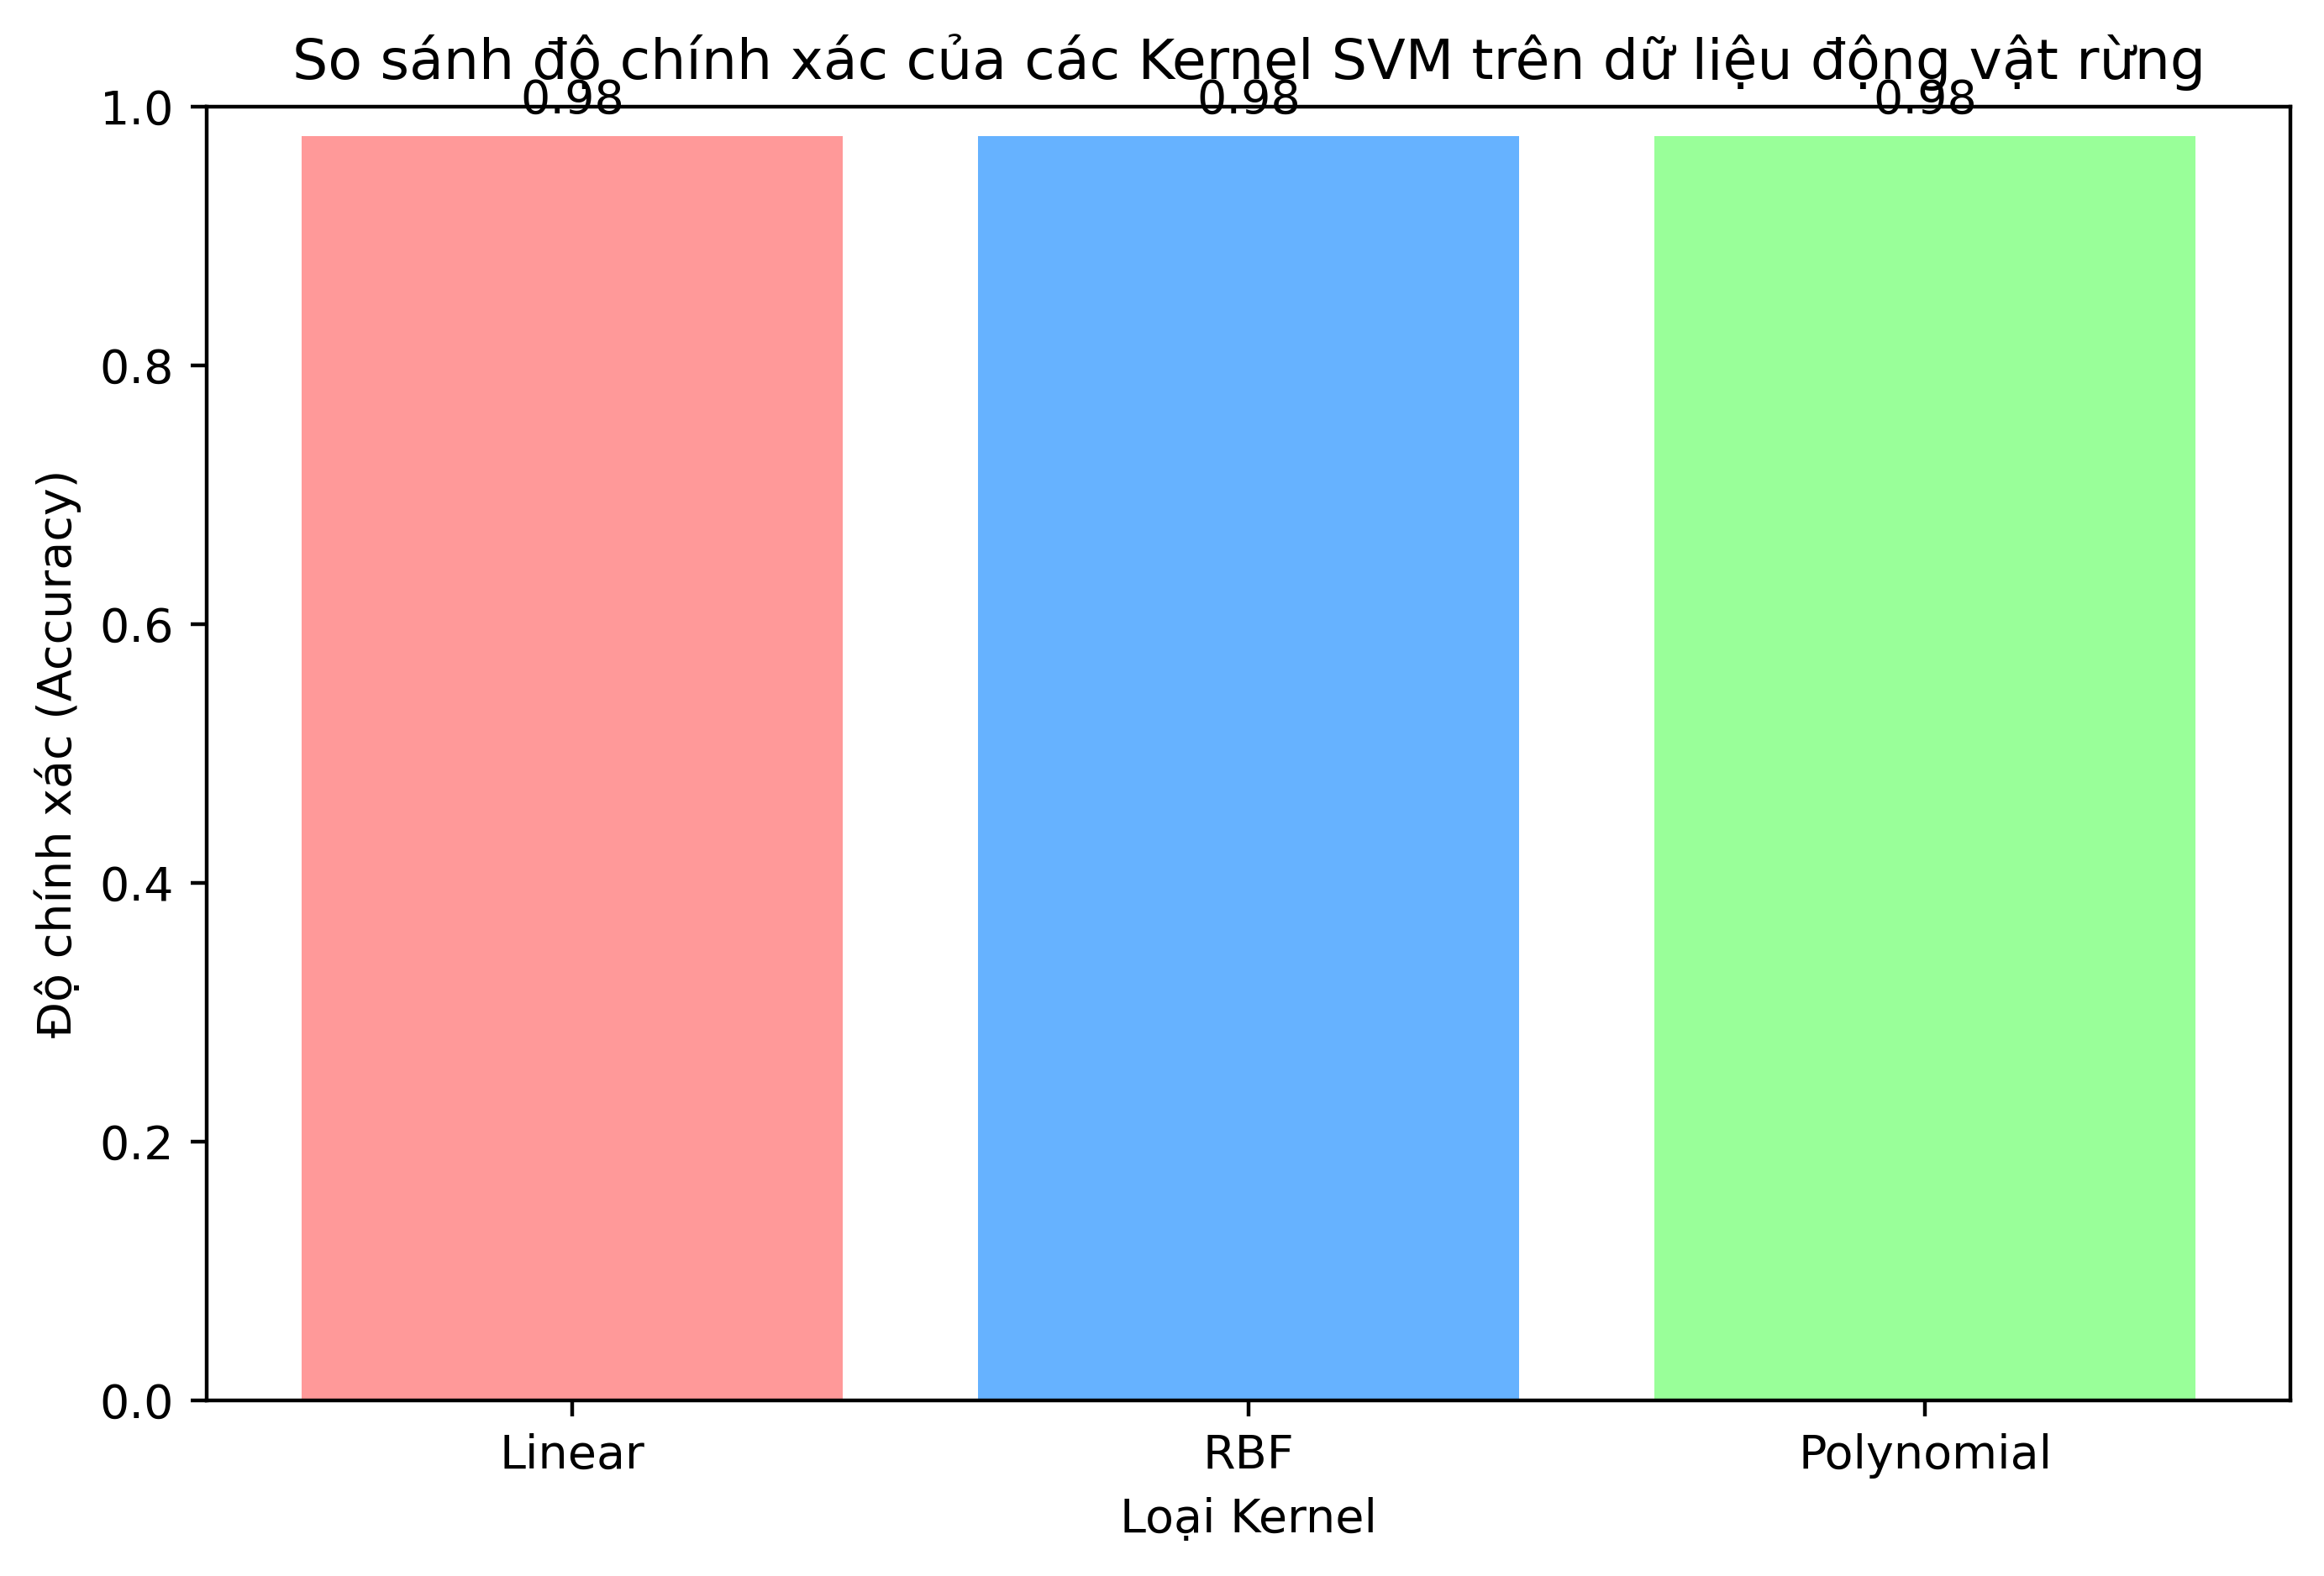

In [14]:
# Dữ liệu để vẽ biểu đồ
kernels = ['Linear', 'RBF', 'Polynomial']
accuracies = [accuracy_linear, accuracy_rbf, accuracy_poly]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('So sánh độ chính xác của các Kernel SVM trên dữ liệu động vật rừng')
plt.xlabel('Loại Kernel')
plt.ylabel('Độ chính xác (Accuracy)')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

### 6. Đánh giá với Confusion Matrix (cho SVM RBF - kernel tốt nhất)

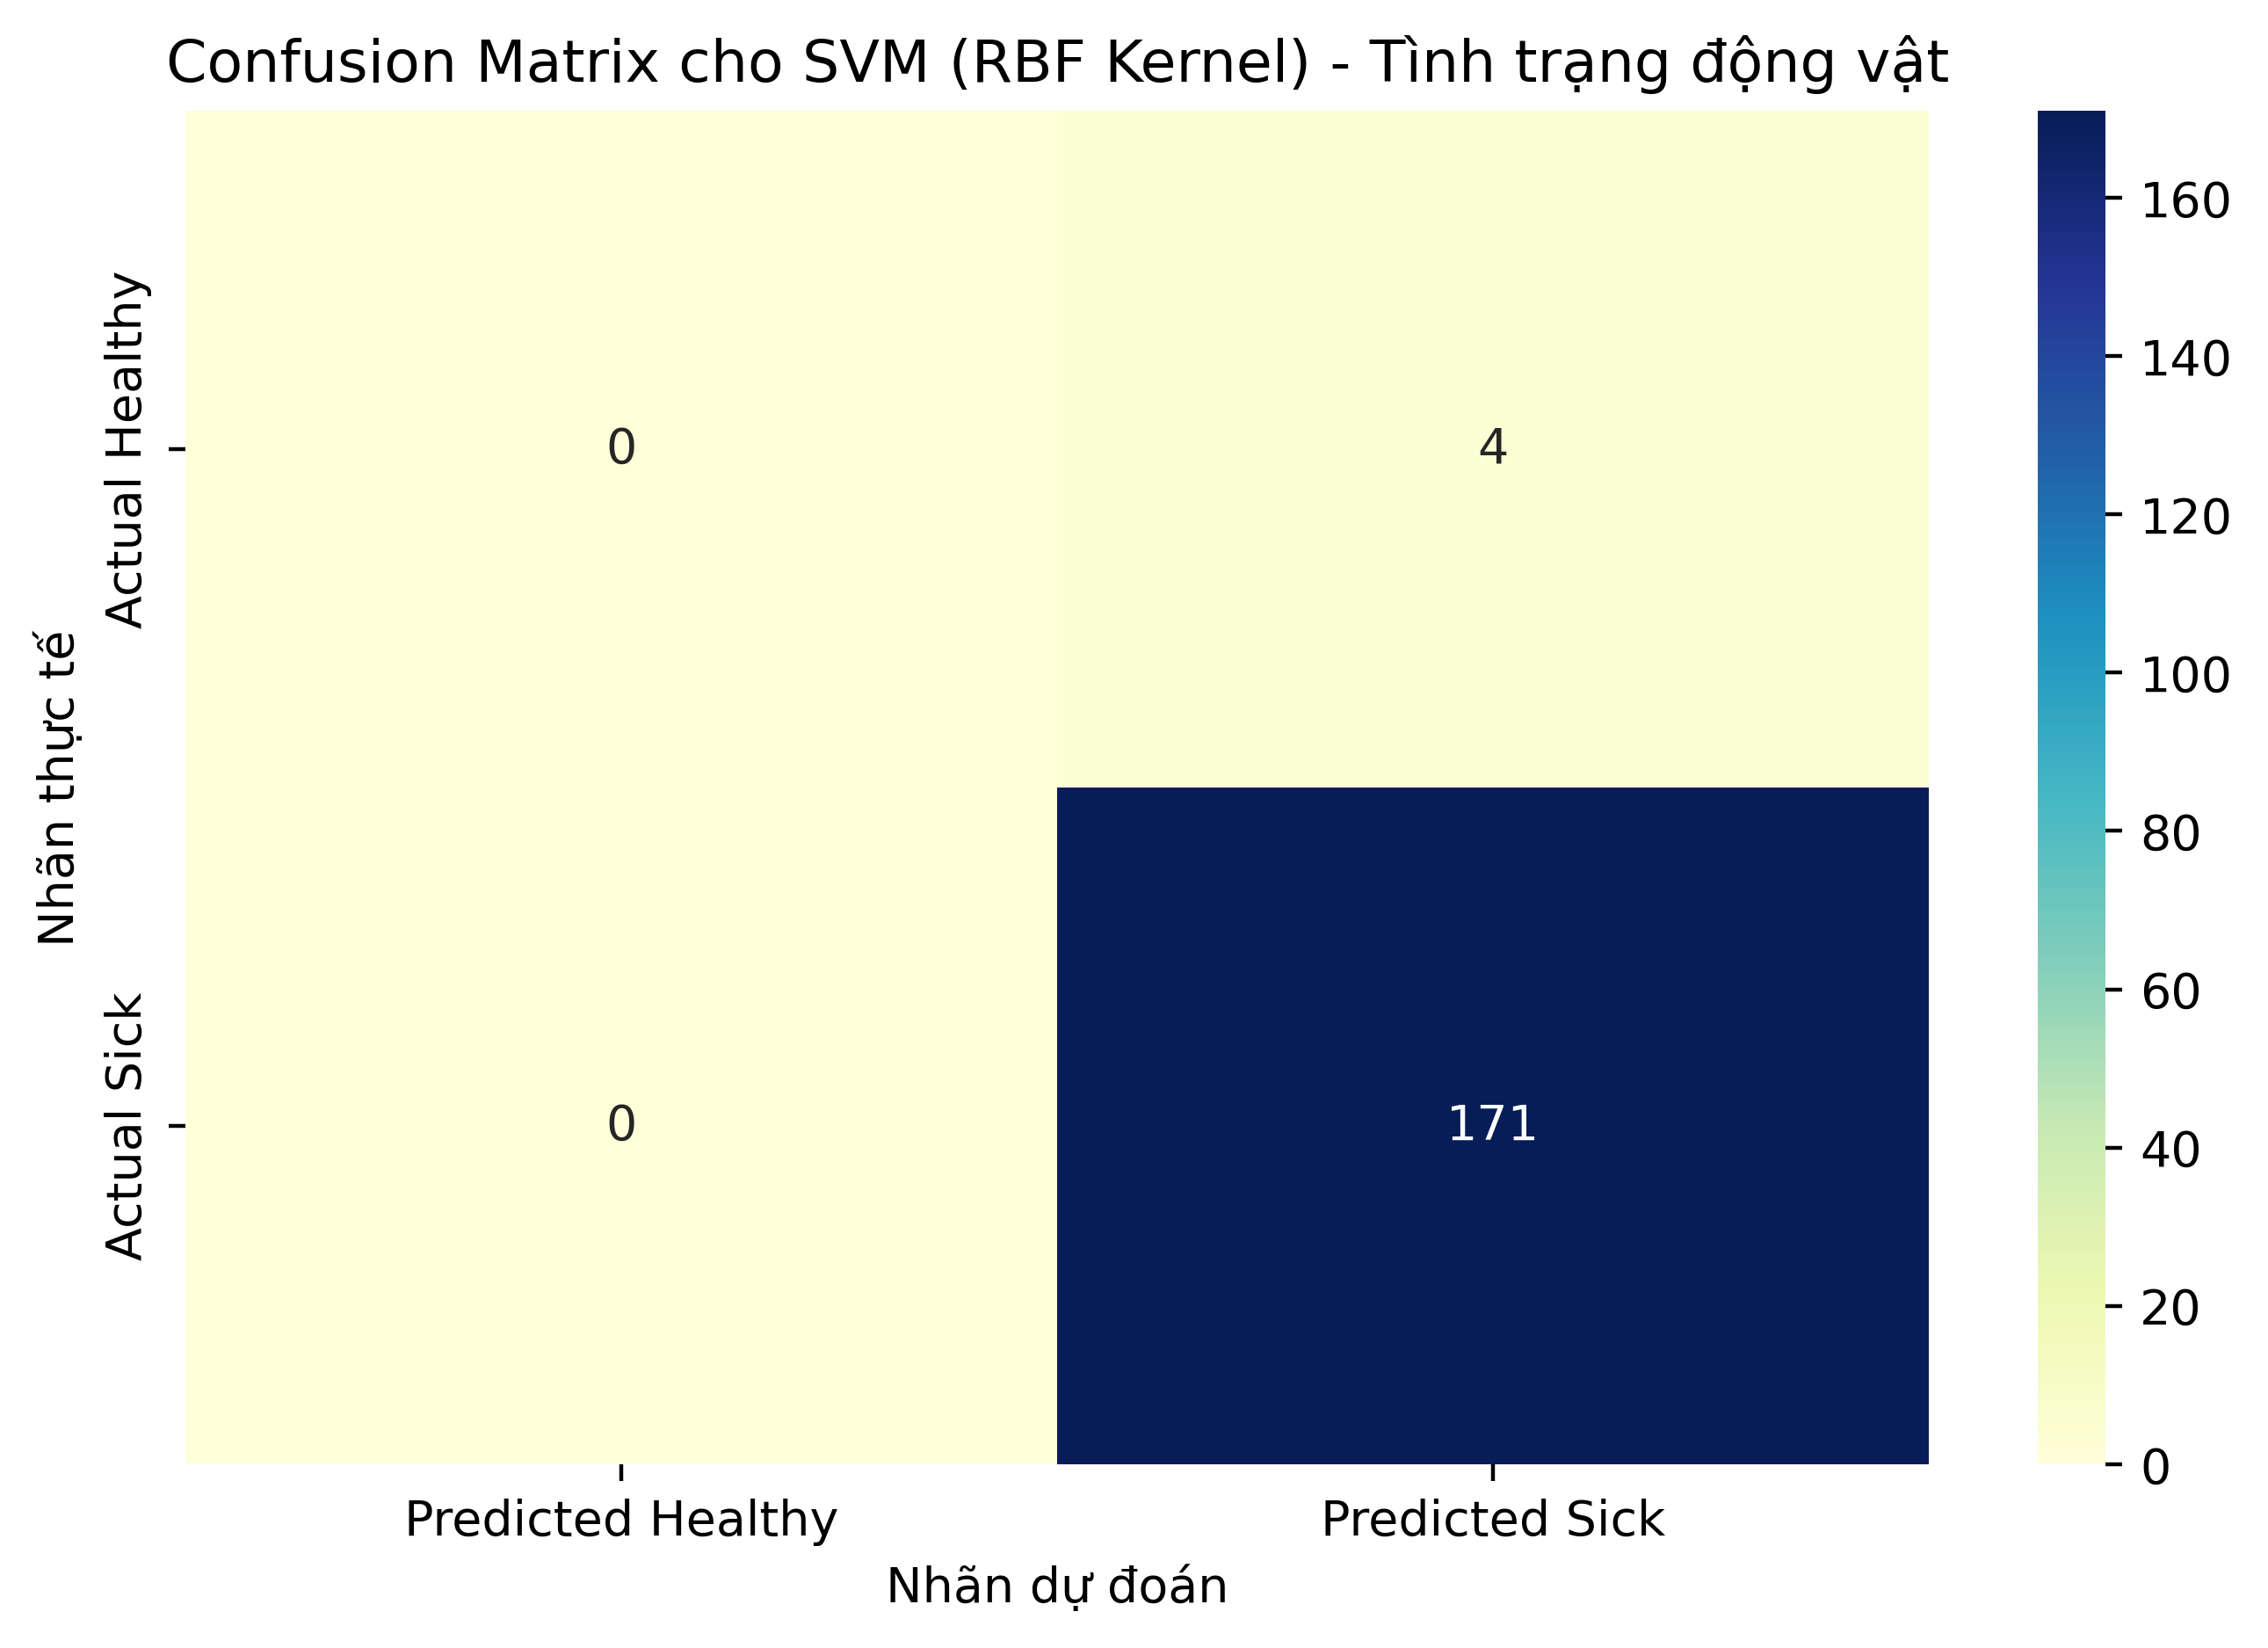

Confusion Matrix:
                Predicted Healthy  Predicted Sick
Actual Healthy                  0               4
Actual Sick                     0             171


In [15]:
# Tính Confusion Matrix cho SVM RBF
cm = confusion_matrix(y_test, y_pred_rbf)
class_names = ['Healthy', 'Sick']  # Điều chỉnh dựa trên nhãn thực tế
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted {name}' for name in class_names], 
                          index=[f'Actual {name}' for name in class_names])

# Vẽ Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix cho SVM (RBF Kernel) - Tình trạng động vật')
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

### 7. Tối ưu hóa tham số với GridSearchCV (cho RBF Kernel)

In [16]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Định nghĩa lưới tham số cho RBF
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# In tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy: {accuracy_best:.2f}")
print("\nClassification Report (Best SVM):")
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM Accuracy: 0.98

Classification Report (Best SVM):
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         4
         Yes       0.98      1.00      0.99       171

    accuracy                           0.98       175
   macro avg       0.49      0.50      0.49       175
weighted avg       0.95      0.98      0.97       175



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
